In [1]:
pwd

'C:\\Users\\qwert\\Music\\Data Science Class\\ML\\Project-2\\archive (1)\\Genre Classification Dataset'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data_test = pd.read_csv('C:/Users/qwert/Music/Data Science Class/ML/Project-2/archive (1)/Genre Classification Dataset/test_data.txt', sep=":::",header = 0, engine = 'python')
data_train = pd.read_csv('C:/Users/qwert/Music/Data Science Class/ML/Project-2/archive (1)/Genre Classification Dataset/train_data.txt', sep=":::",header = 0, engine = 'python')
data_train.columns = ['SN','movie_name','category','confession']
data_test.columns = ['SN' , 'movie_name' , 'confession']

In [4]:
data_test.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [5]:
data_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   confession  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54213 non-null  int64 
 1   movie_name  54213 non-null  object
 2   category    54213 non-null  object
 3   confession  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
data_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [9]:
data_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [10]:
data_train.shape

(54213, 4)

In [11]:
data_test.shape

(54199, 3)

In [12]:
data_train.isnull().sum()

SN            0
movie_name    0
category      0
confession    0
dtype: int64

In [13]:
data_test.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [14]:
data_test.duplicated().sum()

0

In [15]:
data_train.duplicated().sum()

0

In [16]:
data_test.count()

SN            54199
movie_name    54199
confession    54199
dtype: int64

In [17]:
data_train.count()

SN            54213
movie_name    54213
category      54213
confession    54213
dtype: int64

In [117]:
data_train.iloc[0:3]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [118]:
data_train.loc[1]

SN                                                            3
movie_name                    Young, Wild and Wonderful (1980) 
category                                                 adult 
confession     As the bus empties the students for their fie...
Name: 1, dtype: object

#### Visualization

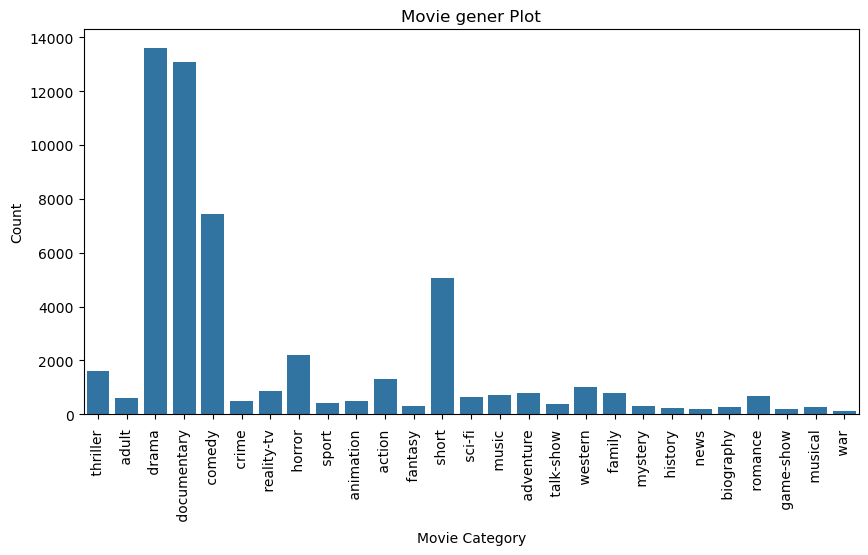

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='category',data=data_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie gener Plot')
plt.xticks(rotation=90)
plt.show()

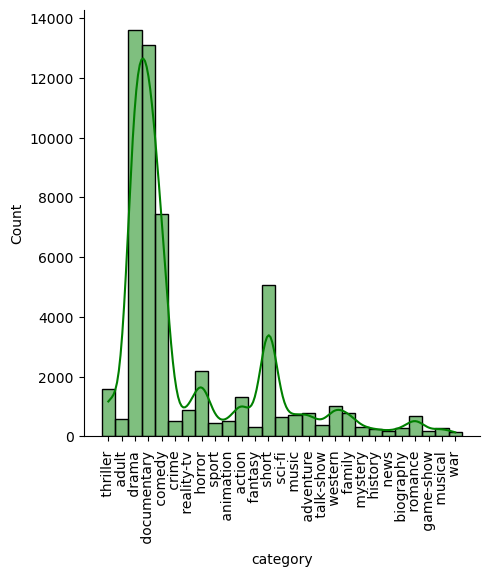

In [22]:
sns.displot(x=data_train['category'], kde = True, color = 'green')
plt.xticks(rotation=90)
plt.show()

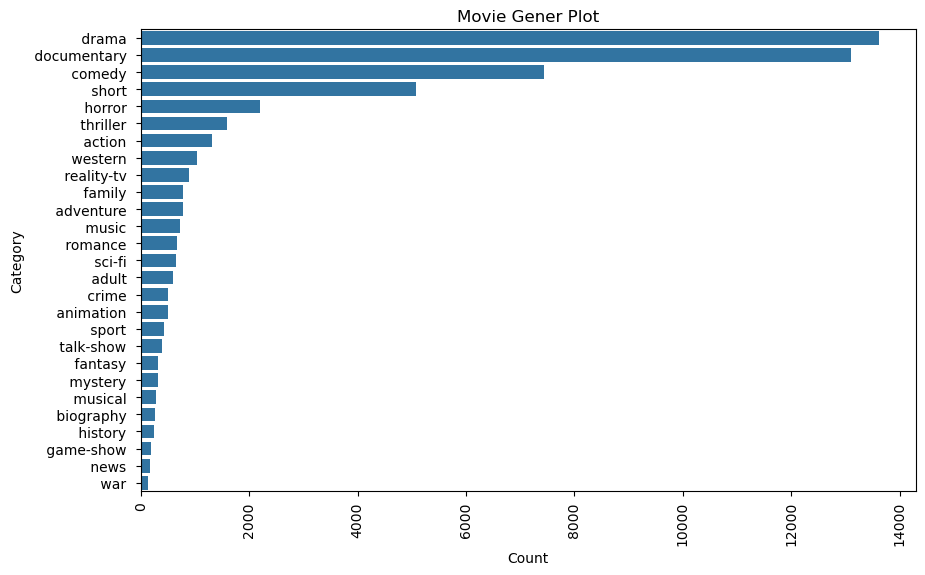

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_train['category'].value_counts(),y = data_train['category'].value_counts().index,orient='h' )
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Movie Gener Plot')
plt.xticks(rotation=90)
plt.show()

In [24]:
data_com = pd.concat([data_train,data_test], axis = 0)

In [25]:
data_com.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [26]:
data_com.shape

(108412, 4)

In [27]:
data_com.isnull().any()

SN            False
movie_name    False
category       True
confession    False
dtype: bool

In [28]:
data_com.count()

SN            108412
movie_name    108412
category       54213
confession    108412
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder = LabelEncoder()

In [31]:
data_com['category'] = label_encoder.fit_transform(data_com['category'].values)

In [32]:
data_com['movie_name'] = label_encoder.fit_transform(data_com['movie_name'].values)

In [33]:
data_com.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [34]:
data_com['category'] = data_com['category'].fillna(data_com['category'].mean())

In [35]:
data_com.count()

SN            108412
movie_name    108412
category      108412
confession    108412
dtype: int64

In [36]:
data_com.duplicated().sum()

0

#### Preprocessing

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [39]:
X = vectorizer.fit_transform(data_com['confession'])

In [40]:
print(X)

  (0, 157976)	0.044477249430271475
  (0, 31420)	0.18357295182159858
  (0, 158497)	0.16622595456155112
  (0, 61598)	0.1258257660822861
  (0, 141407)	0.09916547506480046
  (0, 70252)	0.2035780898857229
  (0, 129782)	0.3169697718229827
  (0, 170864)	0.15564023902831534
  (0, 172023)	0.3013910302792173
  (0, 156315)	0.07956503686230372
  (0, 105710)	0.4592076736397766
  (0, 68495)	0.07904001713936645
  (0, 105707)	0.26996426156594117
  (0, 37370)	0.20888051344031736
  (0, 68246)	0.10425741522311993
  (0, 129851)	0.32114040647299835
  (0, 74803)	0.33273272016659866
  (0, 116701)	0.15201368968503992
  (0, 171715)	0.06160116165572539
  (0, 143821)	0.1710151426358822
  (0, 7942)	0.08310979586818044
  (0, 22915)	0.1622404323345428
  (1, 47700)	0.09692445561912805
  (1, 7705)	0.03354220309347243
  (1, 126227)	0.09416299016049472
  :	:
  (108411, 42217)	0.14530830013607265
  (108411, 170644)	0.05681998893212504
  (108411, 30791)	0.13289560816315024
  (108411, 92666)	0.0890819162204216
  (108411, 

In [41]:
data_com.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [42]:
y = data_com['category']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
naive_bayes_model = MultinomialNB()

In [47]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [48]:
y_pred = naive_bayes_model.predict(X_test)

In [49]:
from sklearn.metrics import *

In [50]:
accuracy_score(y_test,y_pred)

0.49370474565327677

In [51]:
r2_score(y_test,y_pred)

-0.7967143521586344

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       256
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00       146
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00        42
           5       0.23      0.01      0.02      1488
           6       0.00      0.00      0.00        96
           7       1.00      0.00      0.00      2666
           8       0.20      0.00      0.00      2777
           9       0.00      0.00      0.00       151
          10       0.00      0.00      0.00        70
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00        44
          13       0.00      0.00      0.00       480
          14       0.00      0.00      0.00       131
          15       0.00      0.00      0.00        49
          16       0.00      0.00      0.00        73
          17       0.00    

In [53]:
print(confusion_matrix(y_test,y_pred))

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0     0     0     0     0     0     0  

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lin_reg  = LogisticRegression()

In [56]:
lin_reg.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_pred = lin_reg.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test, y_pred)

0.48969238573998064

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test, y_pred)

-0.7991326829537058

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.01      0.02       256
           1       0.60      0.02      0.05       127
           2       0.00      0.00      0.00       146
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00        42
           5       0.35      0.07      0.11      1488
           6       0.00      0.00      0.00        96
           7       0.47      0.21      0.29      2666
           8       0.42      0.09      0.14      2777
           9       0.00      0.00      0.00       151
          10       0.00      0.00      0.00        70
          11       0.67      0.08      0.14        51
          12       0.00      0.00      0.00        44
          13       0.44      0.11      0.18       480
          14       0.39      0.10      0.16       131
          15       0.00      0.00      0.00        49
          16       0.00      0.00      0.00        73
          17       0.00    

In [63]:
print(confusion_matrix(y_test, y_pred))

[[   2    0    0    0    0    0    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0  251]
 [   0    3    0    0    0    2    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  121]
 [   0    1    0    0    0    1    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  143]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0   87]
 [   0    0    0    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   39]
 [   0    0    0    0    0  102    0    1   17    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0 1367]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0  